uppgiften kommer att vara:

1. hämta data från en json-fil och för över den till dictionary
2. presentera datat i en barchrt and pie-chart


Läs in från json till Dictionary


In [1]:
# to be able to read json
import json

# för att kunna ge snyggare print utskrifter

from pprint import pprint

"""läser innehållet i json-filen
och konverterar det till ett python object,
i detta fallet blir det en dictionaries"""

with open("orders_list_with_date.json", "r") as orderfile:
    
    order_dict = json.load(orderfile)
    


show all products in the file 

In [2]:
    
# vi skapar en tom set() för att lagra unika produkter
products = set()

# loopar igenom varje order i listan

for order in order_dict:
    
    # hämta productnamn från dicitonaryn order_dict
    product = order["product"]
    
    products.add(product)
    
pprint(products)


{'headphones',
 'keyboard',
 'laptop',
 'monitor',
 'mouse',
 'printer',
 'router',
 'speaker',
 'tablet',
 'webcam'}


Totala försäljningen av laptops

In [3]:
laptops_total = 0.0

"""loopar igenom dictionaryn och räknar ut den 
totala försäljningen av laptops"""

for order in order_dict:
    
    if order["product"] == "laptop":
        
        laptops_total += order.get("price") * order.get("quantity")
        
print(f"total sale for laptop is ${laptops_total}")




total sale for laptop is $36743.64


Laptop sales per city

In [29]:
lap_top_city_sales = {}

tot_lap = 0 

for order in order_dict:
    
    if order["product"] == "laptop":
        
        city = order.get("city")
        price = order.get("price")
        quantity = order.get("quantity")
        
        tot_lap = round(price * quantity)
        
        if city in lap_top_city_sales:
            
            lap_top_city_sales[city] += tot_lap
            
        else:
            lap_top_city_sales[city] = tot_lap
            
sorted_sales = sorted(lap_top_city_sales.items(),
                      key=lambda item: item[1], reverse=True 
                      )

sorted_sales

[('New York', 11423),
 ('Los Angeles', 8558),
 ('Houston', 7200),
 ('Chicago', 5705),
 ('San Antonio', 4299),
 ('Dallas', 3200),
 ('Phoenix', 3200)]

## count tablet per city

In [30]:
# skapar/nhollställer dictionaryn
tablet_city_sales = {}


tot_tablet = 0.0

# loopar igenom ordrarna i dictionaryn 
for order in order_dict:
    
    # vilket produkt vill jag titta på 
    if order["product"] == "tablet":
          
        # plockar ut stad, pris och kvantitet
        city = order.get("city")
        price = order.get("price")
        quantity = order.get("quantity")
        
        # räknar ut totala försäljningen
        tot_tablet = round(quantity * price, 2)
        
        # lagrar de i dictonaryn city_sales
        if city in tablet_city_sales:
            
            tablet_city_sales[city] += tot_tablet
        else:
            tablet_city_sales[city] = tot_tablet
            



Filtrerar fram top 4 revenue

In [36]:
city_total_sales = {}

city_total_reveneue = 0.0

for order in order_dict:

    #total_reveneue += order.get("price") * order.get("quantity")
       
       city = order.get("city")
       
       price = order.get("price")
       
       quantity = order.get("quantity")
       
       total_city = price * quantity
       
       if city in city_total_sales:
           city_total_sales[city] += total_city

       else:
           city_total_sales[city] = total_city

top4_revenue = sorted(city_total_sales.items(),
                      key=lambda item: item[1], reverse=True)[:4]

top4_revenue

[('New York', 47658.26),
 ('San Antonio', 39847.07),
 ('Houston', 34240.149999999994),
 ('Philadelphia', 32654.209999999992)]

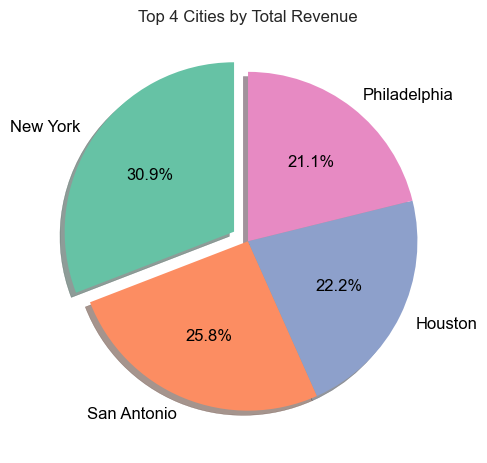

In [37]:

import matplotlib.pyplot as plt

city, total = zip(*top4_revenue)
plt.style.use("seaborn-v0_8")   # aktiverar Seaborn-temat för snyggare färger och layout

labels = city
colors=plt.get_cmap("Set2").colors[:4]
explode = (0.1, 0,0,0)
fig, ax = plt.subplots()
plt.title("Top 4 Cities by Total Revenue")
ax.set_aspect("equal") # cirkeln kommer alltid vara rund
# detta är egenskaper för piechart
ax.pie(total, colors=colors, explode = explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90, textprops={'color': 'black', 'fontsize':12, 'fontweight':'normal'});


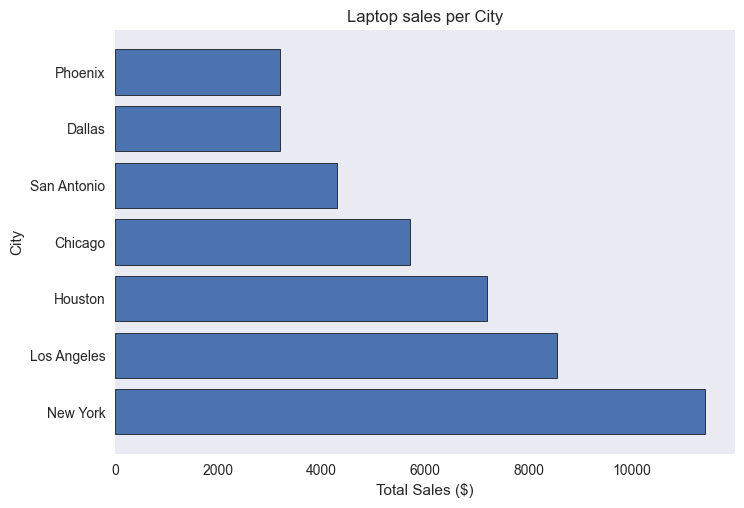

In [33]:
import matplotlib.pyplot as plt  # importerar matplotlib-biblioteket för visualisering

# packar upp den sorterade listan (från störst till minst) i två variabler: cities och sales
cities, sales = zip(*sorted_sales)


plt.style.use("seaborn-v0_8")   # aktiverar Seaborn-temat för snyggare färger och layout
plt.grid(False)                 # stänger av rutnätet i bakgrunden

# ritar ett horisontellt stapeldiagram, med svart kantlinje och tunn kontur
plt.barh(cities, sales, edgecolor="black", linewidth=0.5)

# sätter titel och axelrubriker, justerar teckenstorlek och tyngd
plt.title("Laptop sales per City", fontsize=12)
plt.xticks(fontweight="ultralight")  # justerar typsnittets vikt på x-ticks (siffror)
plt.yticks(fontweight="ultralight")  # justerar typsnittets vikt på y-ticks (städer)
plt.xlabel("Total Sales ($)", fontsize=11, fontweight="normal")  # etikett för x-axeln
plt.ylabel("City", fontsize=11, fontweight="normal")             # etikett för y-axeln

#plt.show                        
ax = plt.gca()                  # hämtar nuvarande axelobjekt
ax.spines["top"].set_visible(True)     # visar övre ramlinjen
ax.spines["right"].set_visible(True)   # visar högra ramlinjen

In [34]:
hex_colors = [mcolors.to_hex(c) for c in plt.get_cmap("Set2").colors]
pprint(hex_colors)

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']


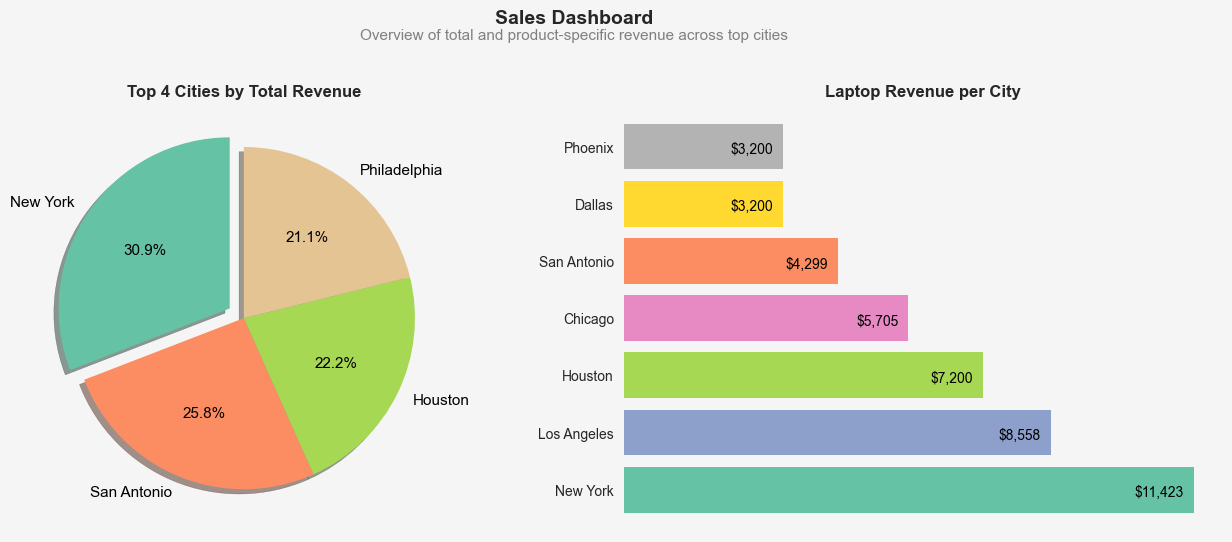

In [35]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# --- Manual color map for consistent city colors across both charts ---
color_map = {
    "New York": "#66c2a5",
    "San Antonio": "#fc8d62", 
    "Philadelphia": "#e5c494",
    "Chicago": "#e78ac3",
    "Dallas": "#ffd92f",
    "Houston": "#a6d854",
    "Los Angeles": "#8da0cb",
    "Phoenix": "#b3b3b3",
    "San Diego": "#b3b3b3",
    "San Francisco": "#999999"
}

# --- Create the figure area (canvas) with two subplots next to each other ---
colors = color_map
fig, ax = plt.subplots(ncols=2, figsize=(14,6))

# --- Global title and subtitle for the full dashboard ---
fig.suptitle("Sales Dashboard", fontsize=14, fontweight='bold')
fig.text(0.5, 0.93, "Overview of total and product-specific revenue across top cities",
         ha='center', fontsize=11, color='gray')

plt.tight_layout(pad=3.0)  # Adjust spacing between the two subplots
plt.style.use("seaborn-v0_8")  # Apply a clean Seaborn-like style

# --- Unpack city and revenue data for both charts ---
city, total = zip(*top3_revenue)
cities, sales = zip(*sorted_sales)

# --- Match colors for the cities in both datasets (fallback color = gray) ---
pie_colors = [color_map.get(c, "#cccccc") for c in city]
bar_colors = [color_map.get(c, "#cccccc" ) for c in cities]

# -------------------- PIE CHART --------------------
ax[0].grid(False)  # Disable background grid for pie chart
ax[0].set_title("Top 4 Cities by Total Revenue", fontsize=12, fontweight="bold")
explode = (0.1, 0, 0, 0)  # Slightly separate the first slice (highlight top city)

# Create pie chart for total revenue per top city
ax[0].pie(total, labels=city, colors=pie_colors,
          explode=explode, autopct='%1.1f%%',
          startangle=90, shadow=True,
          textprops={'fontsize': 11, 'color': 'black', 'fontweight': 'normal'})

# (These two lines below are redundant reassignments, but left unchanged as requested)
pie_colors = [color_map[c] for c in city]
bar_colors = [color_map[c] for c in cities]

# -------------------- BAR CHART --------------------
# Create horizontal bar chart for laptop revenue per city
ax[1].barh(cities, sales, color=bar_colors)
ax[1].grid(False)  # Disable background grid
ax[1].set_title("Laptop Revenue per City", fontsize=12, fontweight="bold")
ax[1].set_facecolor("none")  # Transparent background behind bars

fig.patch.set_facecolor("#f5f5f5")  # Light gray background for the full figure

# Add value labels (text) inside each bar
bars = ax[1].barh(cities, sales, color=bar_colors)
ax[1].set_xticklabels([])  # Hide x-axis tick labels for cleaner layout

for bar in bars:
    width = bar.get_width()  # Get the bar’s numeric value
    bar_color = bar.get_facecolor()  # Get the bar’s fill color
    lighter_color = mcolors.to_rgba(bar_color, alpha=0.25)  # Create a transparent version of the same color
    
    # Add formatted revenue label inside each bar
    ax[1].text(width - 200,            
               bar.get_y() + bar.get_height() / 2 - 0.05,
               f"${width:,.0f}",
               ha="right", va="center",
               fontsize=10, color="black", fontweight="normal",
               bbox=dict(facecolor=lighter_color, edgecolor="none", boxstyle="round, pad=0.25"))
    
plt.savefig("sales_dashboard.png", dpi=200, 
            bbox_inches="tight",pad_inches=0.3, 
            facecolor=fig.get_facecolor(),
            edgecolor="none")